In [33]:
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
data = [
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_aircraft_carrier.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_airplane.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_alarm_clock.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_ambulance.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_angel.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_animal_migration.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_apple.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_anvil.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_The_Eiffel_Tower.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_The_Great_Wall_of_China.npy"),
    np.load("E:\\quickdraw\\Data\\full_numpy_bitmap_The_Mona_Lisa.npy")
]

In [35]:
X=np.concatenate([data[0][:3000,:], data[1][:3000,:]],axis=0)
y=np.concatenate([[0]*3000,[1]*3000])
for i in range(2,11):
    X=np.concatenate([X,data[i][:3000,:]], axis=0)
    y=np.concatenate([y,[i]*3000])

In [36]:
print(X.shape)
print(y.shape)

(33000, 784)
(33000,)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

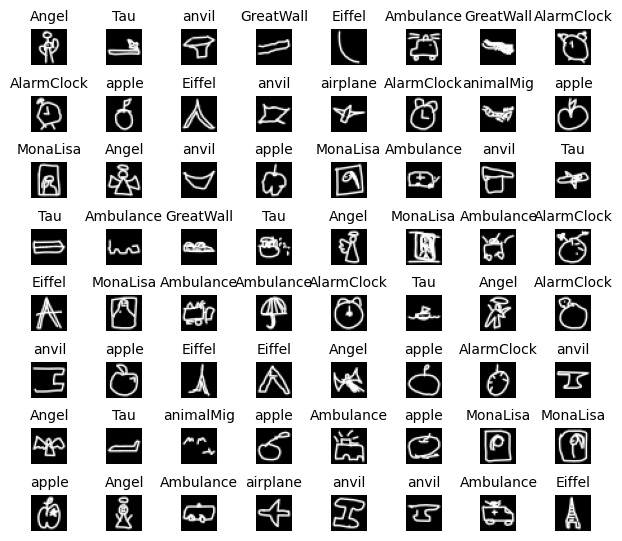

In [38]:
m,n =X.shape
obj=["Tau","airplane","AlarmClock","Ambulance","Angel","animalMig","apple","anvil","Eiffel","GreatWall","MonaLisa"]
fig,axes=plt.subplots(8,8,figsize=(6,6))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92])
for i,ax in enumerate(axes.flat):
    random_index=np.random.randint(m)
    X_random_reshape=X[random_index].reshape((28,28))
    ax.imshow(X_random_reshape,cmap="gray")
    for j in range(len(obj)):
        if( y[random_index]==j ):
            tit=obj[j]
    ax.set_title(tit,fontsize=10)
    ax.set_axis_off()

In [39]:
model=Sequential(
    [
        tf.keras.Input(shape=(28*28,)),
        Dense(25,activation="ReLU"),
        Dense(15,activation="ReLU"),
        Dense(11,activation="linear")
    ]
)

In [40]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)
model.fit(
    X_train_norm,y_train,
    epochs=100
)

Epoch 1/100
825/825 [==============================] - 2s 1ms/step - loss: 1.1806
Epoch 2/100
825/825 [==============================] - 1s 1ms/step - loss: 0.8695
Epoch 3/100
825/825 [==============================] - 1s 1ms/step - loss: 0.7987
Epoch 4/100
825/825 [==============================] - 1s 1ms/step - loss: 0.7569
Epoch 5/100
825/825 [==============================] - 1s 2ms/step - loss: 0.7241
Epoch 6/100
825/825 [==============================] - 1s 1ms/step - loss: 0.6975
Epoch 7/100
825/825 [==============================] - 1s 1ms/step - loss: 0.6775
Epoch 8/100
825/825 [==============================] - 1s 2ms/step - loss: 0.6597
Epoch 9/100
825/825 [==============================] - 1s 2ms/step - loss: 0.6451
Epoch 10/100
825/825 [==============================] - 1s 2ms/step - loss: 0.6324
Epoch 11/100
825/825 [==============================] - 1s 2ms/step - loss: 0.6208
Epoch 12/100
825/825 [==============================] - 1s 2ms/step - loss: 0.6097
Epoch 13/100


predict do layer cuối là linear nên output sẽ là 1 mảng chứa các float.
Predict sẽ là vị trí của thằng có giá trị lớn nhất trong mảng đó
nếu layer cuối là softmax thì ouyput sẽ là vị trí của thằng có xác suất lớn nhất

In [41]:

m, n = X_test_norm.shape
random_index=np.random.randint(m)
prediction=model.predict(X_test_norm[random_index].reshape(1,28*28))
print(np.argmax(prediction))
print(prediction)

1/1 [==============================] - 0s 86ms/step
6
[[-51.18795  -62.222645 -37.5273   -38.54717  -56.130985 -53.752598
  -23.275686 -50.76371  -74.69968  -61.90789  -47.79362 ]]


1/1 [==============================] - 0s 27ms/step


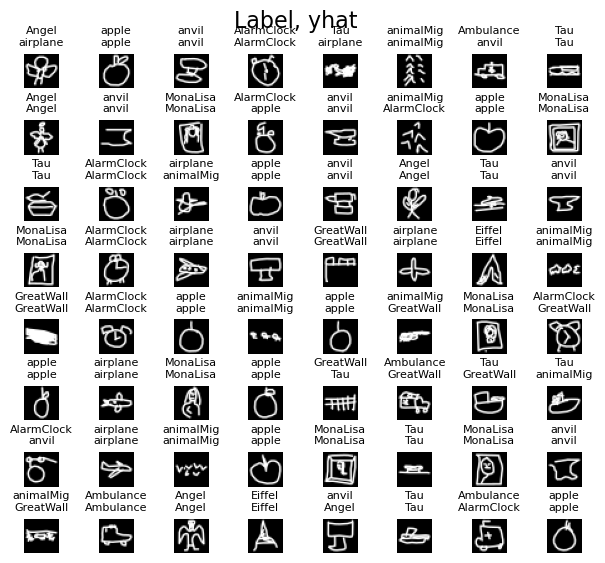

In [42]:
m, n = X_test_norm.shape
obj=["Tau","airplane","AlarmClock","Ambulance","Angel","animalMig","apple","anvil","Eiffel","GreatWall","MonaLisa"]

fig,axes=plt.subplots(8,8,figsize=(6,6))
fig.tight_layout(pad=0.2,rect=[0, 0.03, 1, 0.92])
count=0
for i, ax in enumerate(axes.flat):
    random_index=np.random.randint(m)
    X_random_reshaped=X_test[random_index].reshape(28,28)
    ax.imshow(X_random_reshaped,cmap="gray")
    prediction=model.predict(X_test_norm[random_index].reshape(1,28*28))
    
    ax.set_title(f"{obj[y_test[random_index]]}\n{obj[np.argmax(prediction)]}",fontsize=8)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()